<a href="https://colab.research.google.com/github/SiriBatchu/CMPE255_Short_Story_Assignment/blob/main/TimeSeriesForecasting_Univariate_with_ExogenousVariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"


In [ ]:
def what_is_installed():
  from pycaret import show_versions
  show_versions()

try:
  what_is_installed()
except ModuleNotFoundError:
  !pip install pycaret
  what_is_installed()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 536.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd

from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [ ]:
global_fig_settings = {
    "renderer": "png",
    "width": 1000,
    "height": 600}


In [ ]:
data = get_data("energy")

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
print(data.head())
print(data.columns)

   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  
0         21.33  
1         21.33  
2         21.33  
3         21.3

In [ ]:
data = get_data("energy")
target = "Cooling Load"

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
#EDA experiment
eda = TSForecastingExperiment()

In [ ]:
eda.setup(data=data,
          target=target,
          fh=48,
          numeric_imputation_target="ffill",
          numeric_imputation_exogenous="ffill",
          fig_kwargs=global_fig_settings,
          session_id=123)

,Description,Value
0,session_id,123
1,Target,Cooling Load
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(768, 10)"
5,Transformed data shape,"(768, 10)"
6,Transformed train set shape,"(720, 10)"
7,Transformed test set shape,"(48, 10)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


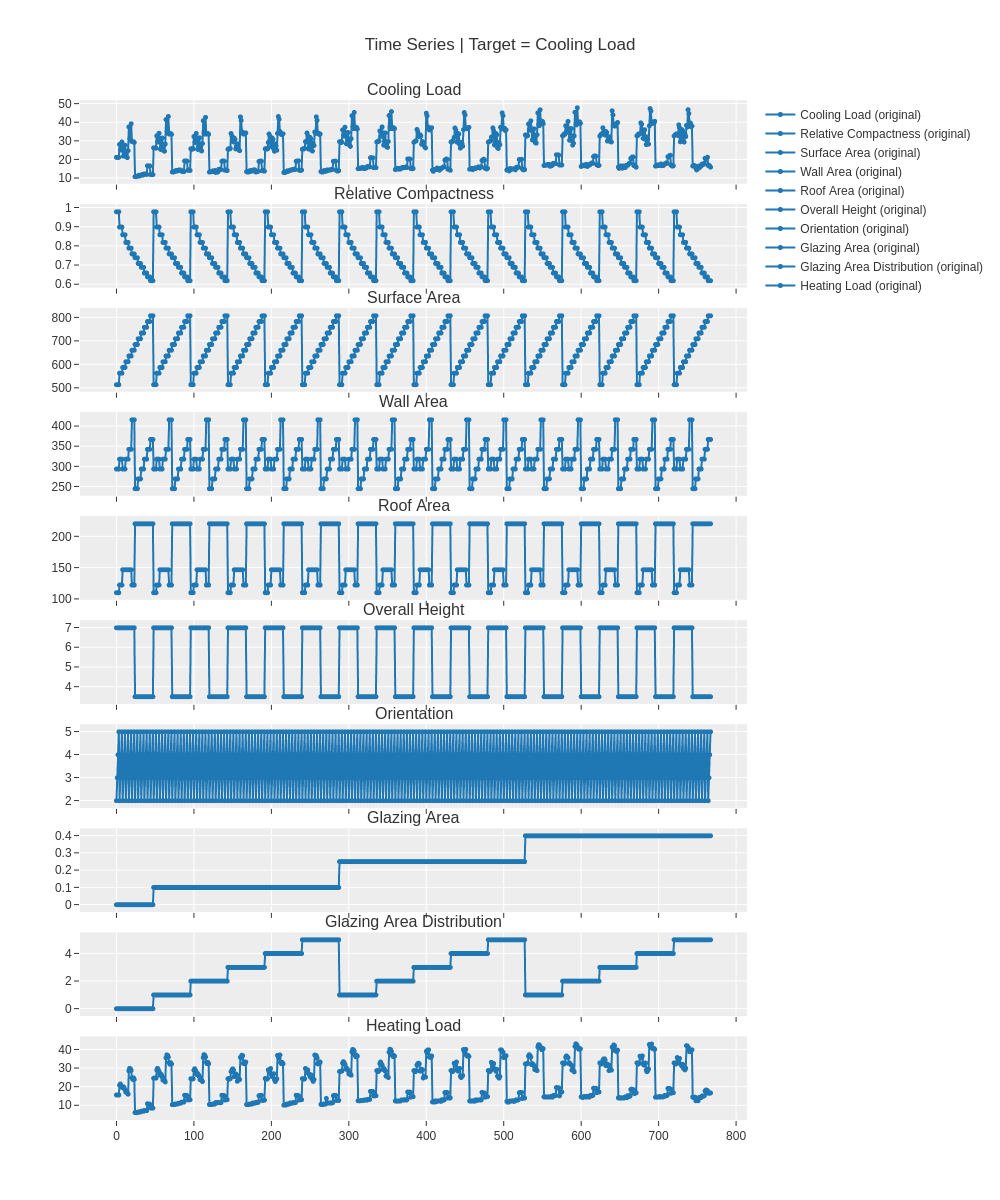

In [ ]:
eda.plot_model(fig_kwargs={"renderer": "png", "width":1000, "height": 1200})


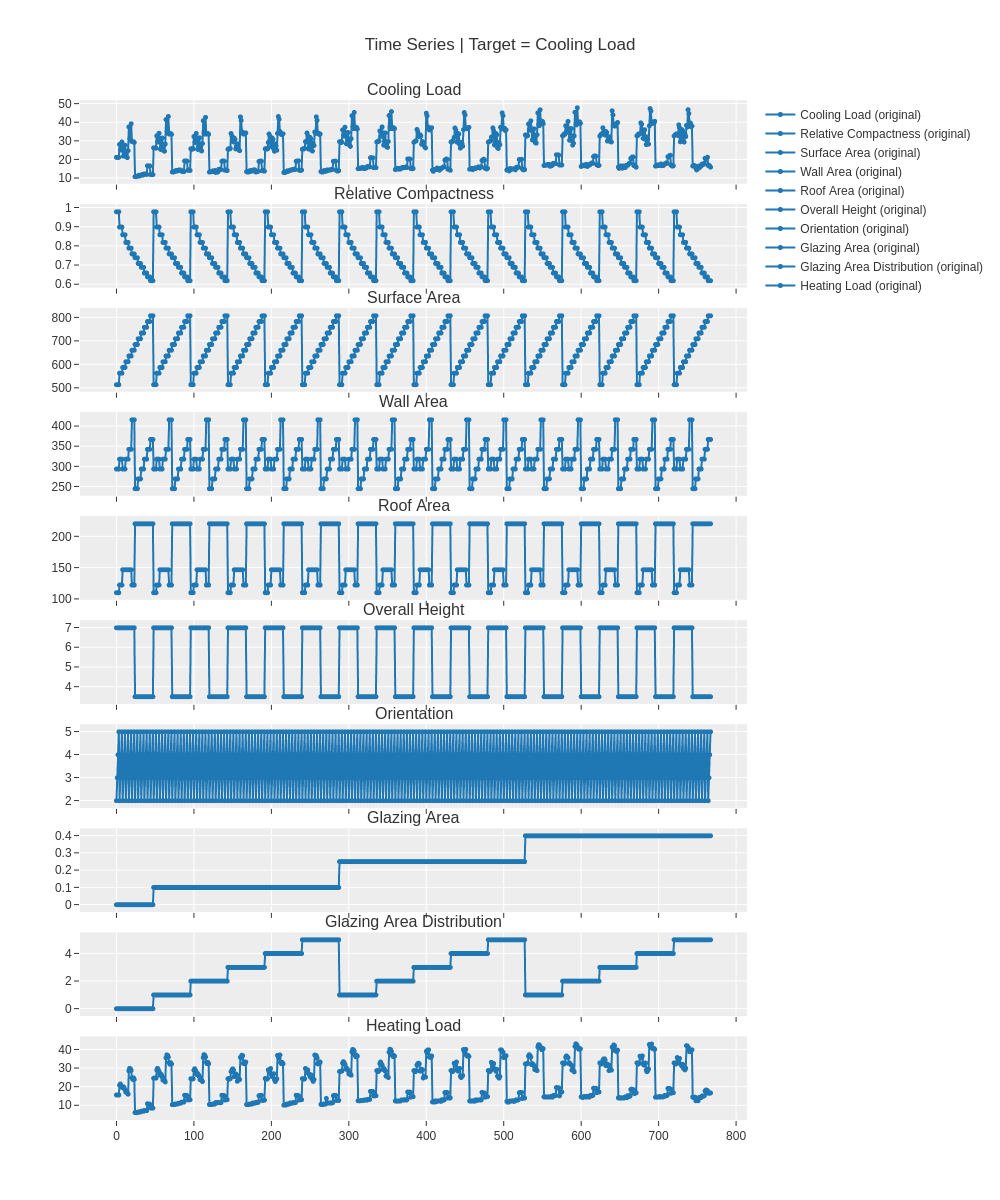

In [ ]:
eda.plot_model(plot="ts", fig_kwargs={ "height": 1200, "resampler_kwargs":{"default_n_shown_samples":1500,"show_dash":{"mode":"inline","port":8055}}})


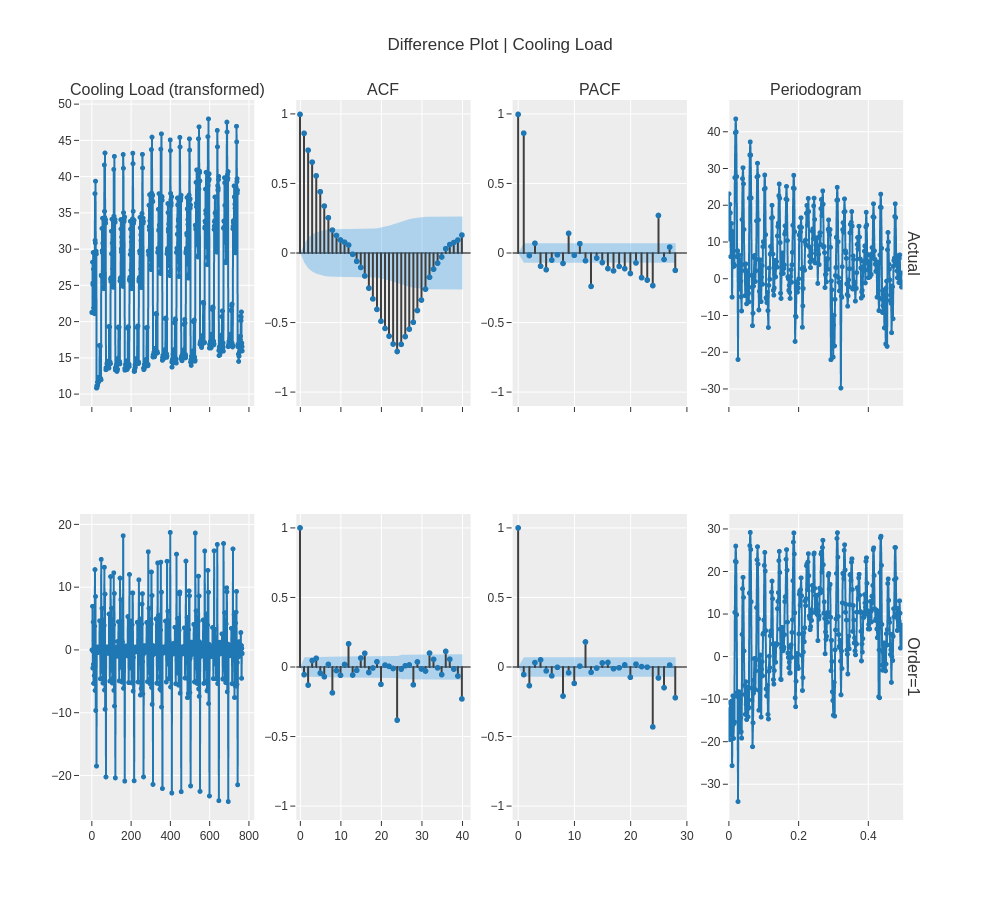

In [ ]:
eda.plot_model(plot="diff", fig_kwargs={"height": 900, "resampler_kwargs": {"default_n_shown_samples": 1500}}, data_kwargs={"acf": True, "pacf": True, "periodogram":True})


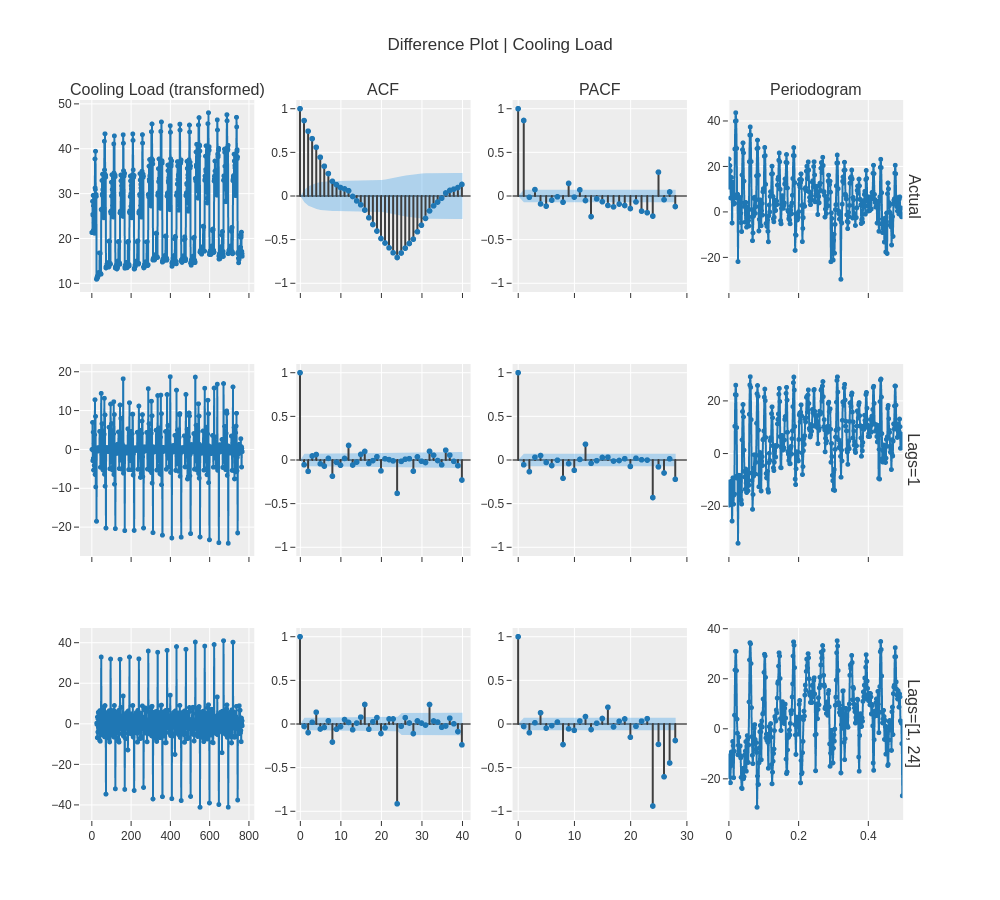

In [ ]:
eda.plot_model(
    plot="diff",
    fig_kwargs={"height": 900, "resampler_kwargs": {"default_n_shown_samples": 1500, "show_dash": {"mode": "inline", "port": 8056},},},
    data_kwargs={"lags_list":[1,[1,24]],"acf": True, "pacf": True, "periodogram": True,},
)

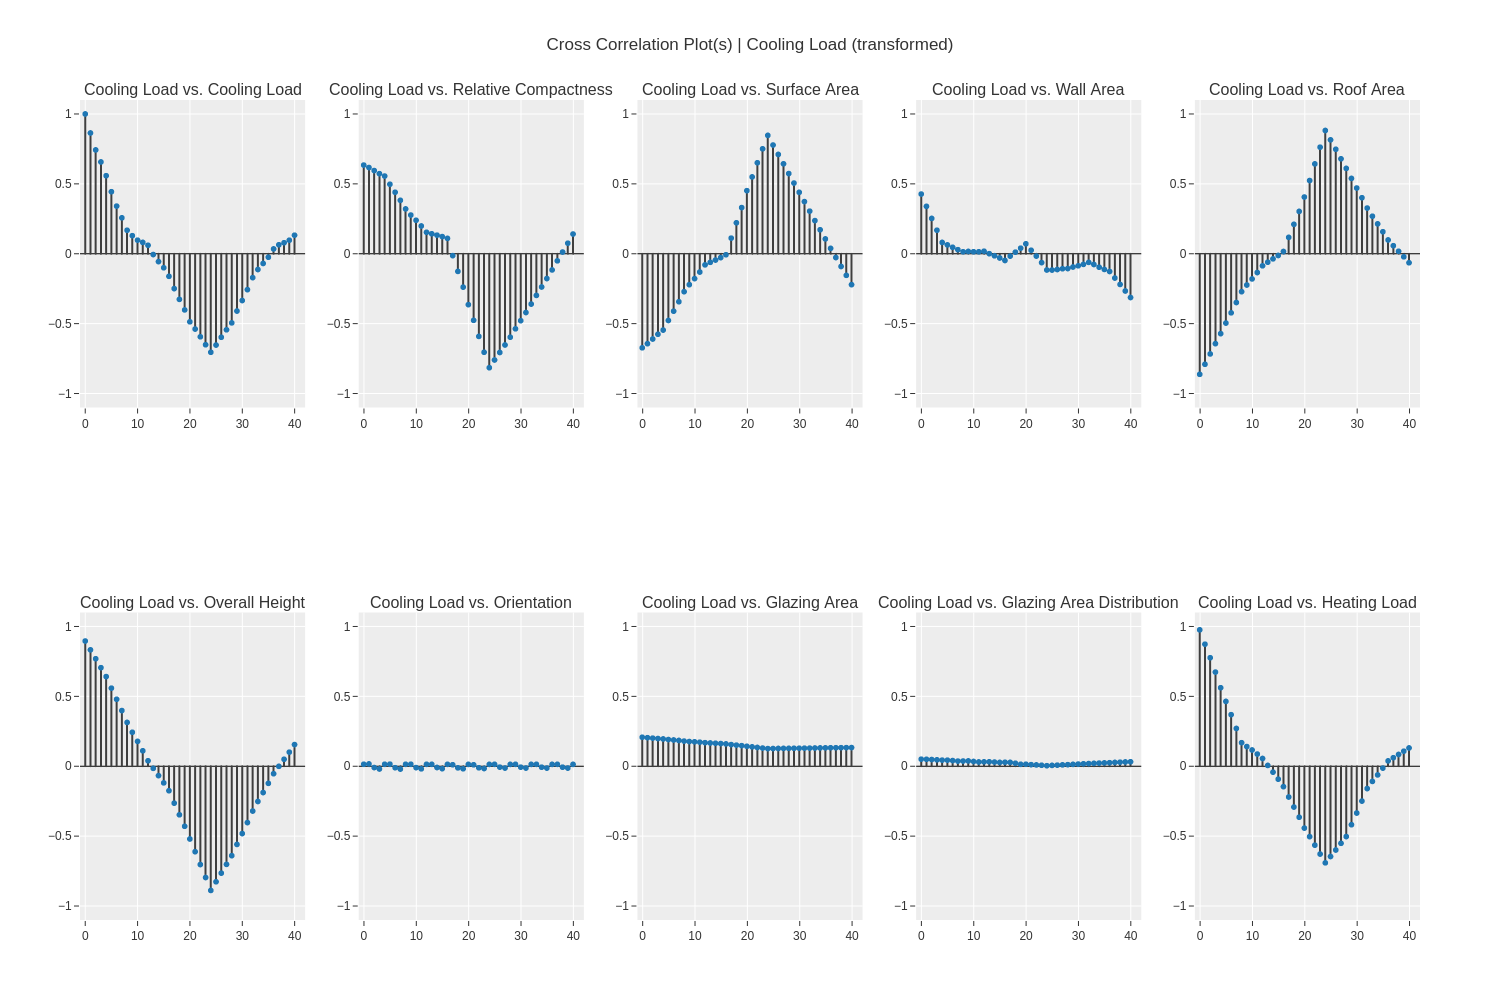

In [ ]:
eda.plot_model(plot="ccf", fig_kwargs={"height":1000, "width":1500})


In [ ]:
data_uni = data.copy()
data_uni = data_uni[target]

exp_uni = TSForecastingExperiment()
exp_uni.setup(data=data_uni,
              fh=48,
              numeric_imputation_target="ffill",
              numeric_imputation_exogenous="ffill",
              fig_kwargs=global_fig_settings,
              session_id=123)

,Description,Value
0,session_id,123
1,Target,Cooling Load
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(768, 1)"
5,Transformed data shape,"(768, 1)"
6,Transformed train set shape,"(720, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
model = exp_uni.create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,575.0000,10.7389,6.4270,43.0249,43.1975,1.8337,1.9997,-18.2918
1,623.0000,10.7019,6.3985,43.0950,43.2582,1.9002,2.0000,-19.1976
2,671.0000,11.5937,6.8926,46.5453,46.7709,1.9957,2.0000,-21.4909
Mean,nan,11.0115,6.5727,44.2217,44.4089,1.9099,1.9999,-19.6601
SD,nan,0.4120,0.2265,1.6433,1.6704,0.0665,0.0002,1.3463


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

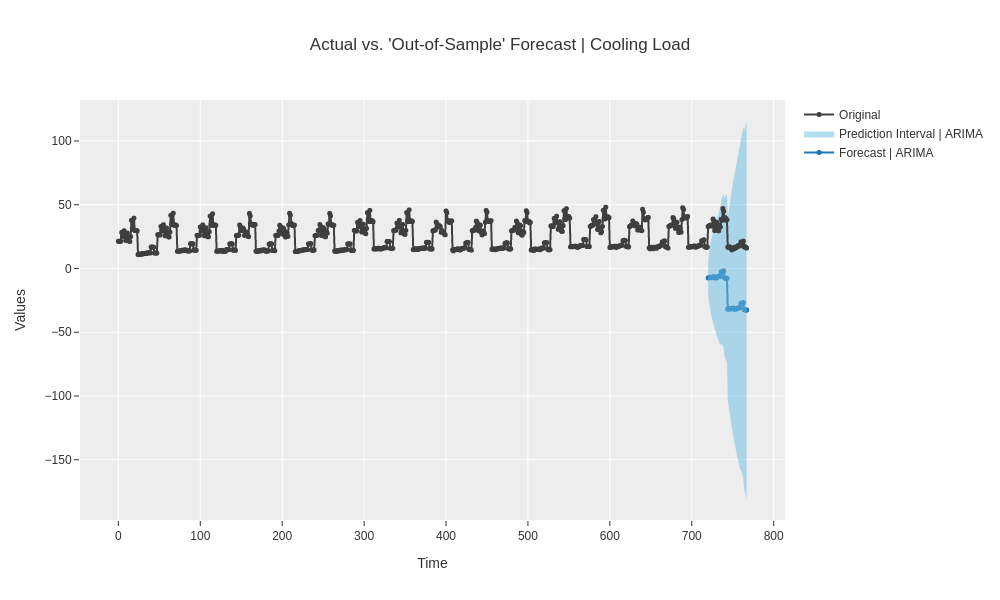

In [ ]:
exp_uni.plot_model(model)


#Improved

In [ ]:
exp_exo = TSForecastingExperiment()
exp_exo.setup(data=data,
              target=target,
              fh=48,
              numeric_imputation_target="ffill",
              numeric_imputation_exogenous="ffill",
              fig_kwargs=global_fig_settings, session_id=123)


,Description,Value
0,session_id,123
1,Target,Cooling Load
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(768, 10)"
5,Transformed data shape,"(768, 10)"
6,Transformed train set shape,"(720, 10)"
7,Transformed test set shape,"(48, 10)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
model_exo = exp_exo.create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))



,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,575.0000,0.8782,0.5598,3.5184,3.7623,0.1544,0.1705,0.8537
1,623.0000,0.9871,0.6431,3.9748,4.3477,0.1869,0.2147,0.7960
2,671.0000,1.3294,0.8687,5.3370,5.8949,0.2460,0.2990,0.6427
Mean,nan,1.0649,0.6905,4.2767,4.6683,0.1958,0.2281,0.7641
SD,nan,0.1922,0.1305,0.7725,0.8996,0.0379,0.0533,0.0890


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

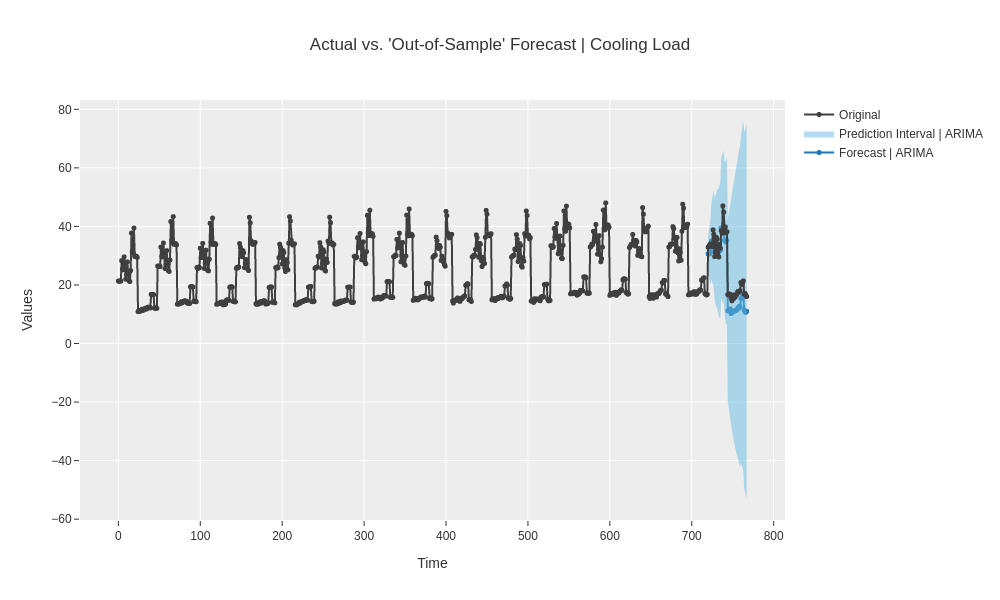

In [ ]:
exp_exo.plot_model(model_exo)


In [ ]:
final_model_exo = exp_exo.finalize_model(model_exo)


In [ ]:
def safe_predict(exp, model):
  try:
    exp.predict_model(model)
  except ValueError as e:
    print(e)
    exo_vars=exp.exogenous_variables
    print(f"{len(exo_vars)} exogenous variables (X) needed in order to make predictions:\n{exo_vars}")
    safe_predict(exp_exo, final_model_exo)


In [ ]:
exp_slim = TSForecastingExperiment()
keep = [target]
data_slim = data[keep]
exp_slim.setup(data=data_slim,
               target=target,
               fh=48,
               numeric_imputation_target="ffill",
               numeric_imputation_exogenous="ffill",
               fig_kwargs=global_fig_settings,
               session_id=123)


,Description,Value
0,session_id,123
1,Target,Cooling Load
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(768, 1)"
5,Transformed data shape,"(768, 1)"
6,Transformed train set shape,"(720, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
model_slim = exp_slim.create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,575.0000,10.7389,6.4270,43.0249,43.1975,1.8337,1.9997,-18.2918
1,623.0000,10.7019,6.3985,43.0950,43.2582,1.9002,2.0000,-19.1976
2,671.0000,11.5937,6.8926,46.5453,46.7709,1.9957,2.0000,-21.4909
Mean,nan,11.0115,6.5727,44.2217,44.4089,1.9099,1.9999,-19.6601
SD,nan,0.4120,0.2265,1.6433,1.6704,0.0665,0.0002,1.3463


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

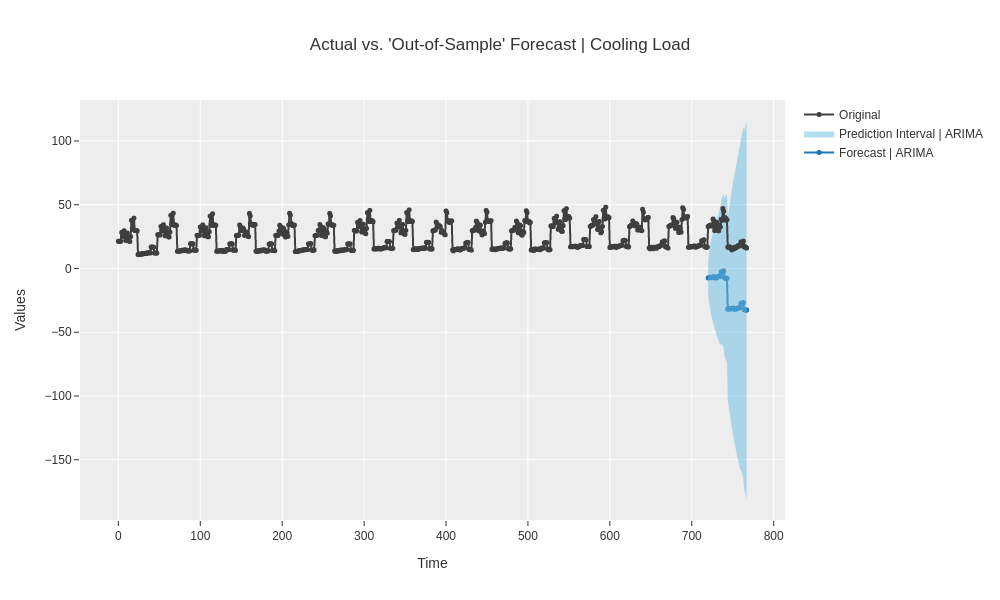

In [ ]:
exp_slim.plot_model(model_slim)


In [ ]:

final_slim_model = exp_slim.finalize_model(model_slim)


In [ ]:
_= exp_slim.save_model(final_slim_model, "final_slim_model")


Transformation Pipeline and Model Successfully Saved


In [ ]:
safe_predict(exp_slim, final_slim_model)


In [ ]:
FH = 48
metric = "mase"

In [ ]:
exp_auto = TSForecastingExperiment()

exp_auto.setup(data=data,
              target=target,
              fh=FH, enforce_exogenous=False,
              numeric_imputation_target="ffill",
              numeric_imputation_exogenous="ffill",
              fig_kwargs=global_fig_settings, session_id=123)

,Description,Value
0,session_id,123
1,Target,Cooling Load
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(768, 10)"
5,Transformed data shape,"(768, 10)"
6,Transformed train set shape,"(720, 10)"
7,Transformed test set shape,"(48, 10)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
best = exp_auto.compare_models(sort=metric, turbo=False)


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.2532,0.2404,1.0171,1.6256,0.0332,0.0328,0.9698,4.5233
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.3010,0.2696,1.2093,1.8218,0.0412,0.0404,0.9644,4.7000
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.3076,0.2504,1.2355,1.6918,0.0458,0.0449,0.9697,2.8800
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.3085,0.2991,1.2402,2.0216,0.0449,0.0437,0.9463,2.0633
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.3193,0.2767,1.2826,1.8695,0.0475,0.0464,0.9626,3.5800
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.3295,0.3017,1.3239,2.0393,0.0437,0.0432,0.9542,3.5767
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.3324,0.2815,1.3353,1.9023,0.0488,0.0479,0.9618,3.4067
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.3546,0.2845,1.4237,1.9221,0.0494,0.0493,0.9612,2.9067
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.3553,0.2900,1.4268,1.9590,0.0504,0.0496,0.9598,3.2467
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.3553,0.2851,1.4265,1.9261,0.0501,0.0498,0.9610,1.9967


Processing:   0%|          | 0/125 [00:00<?, ?it/s]

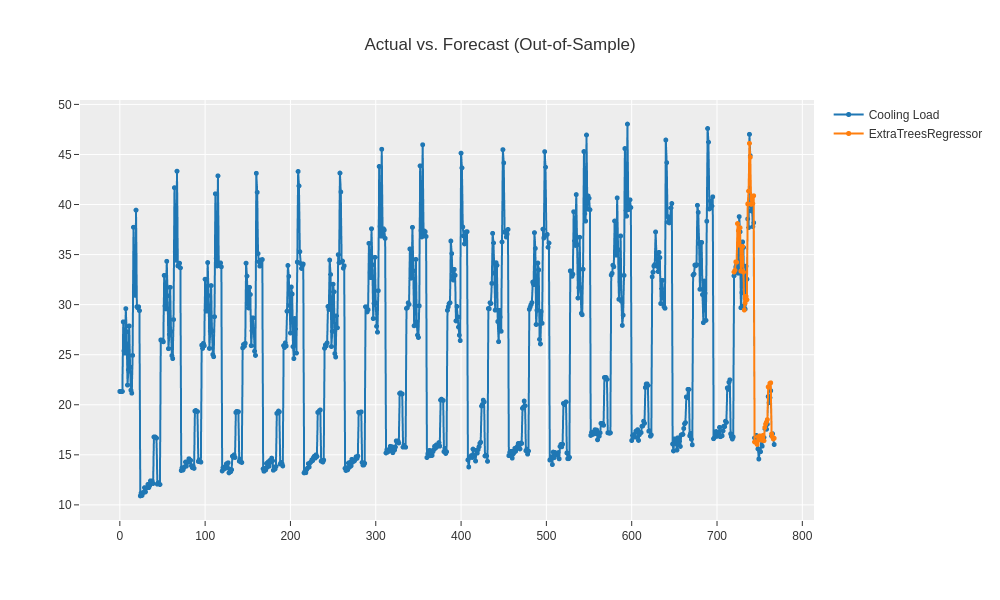

In [ ]:
exp_auto.plot_model(best)


In [ ]:
final_auto_model = exp_auto.finalize_model(best)


In [ ]:
def safe_predict(exp, model):
    try:
        future_preds = exp.predict_model(model)
    except ValueError as e:
        print(e)
        exo_vars=exp.exogenous_variables # Access exogenous variables from the experiment object
        print(f"{len(exo_vars)} exogenous variables (X) needed in order to make predictions:\n{exo_vars}")

        exog_exps = []
        exog_models = []
        for exog_var in exo_vars:
            exog_exp = exp.create_model(estimator='naive') # Use the same experiment object to create models for exogenous variables
            # exog_exp.setup(data=data[exog_var], fh=FH,
            #             numeric_imputation_target="ffill",
            #             numeric_imputation_exogenous="ffill",
            #             fig_kwargs=global_fig_settings, session_id=123)
            # best = exog_exp.compare_models(sort=metric)

            # FIX: Pass the created model to finalize_model, not the experiment object
            final_exog_model = exog_exp.finalize_model(exog_exp.create_model(estimator='naive')) # finalize the exogenous variable model
            exog_exps.append(exog_exp)
            exog_models.append(final_exog_model)


        future_exog = [
            exog_exp.predict_model(exog_model)
            for exog_exp, exog_model in zip(exog_exps, exog_models)
        ]

        future_exog = pd.concat(future_exog, axis=1)
        future_exog.columns = exo_vars

        future_preds = exp.predict_model(model, X=future_exog)
    return future_preds
